In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Завантаження даних

In [3]:
btc_file = './Bitcoin_01.10.2017-20.03.2025_historical_data_coinmarketcap.csv'
eth_file = './Ethereum_01.12.2018-28.02.2025_historical_data_coinmarketcap.csv'


df_btc = pd.read_csv(btc_file, sep=';')
df_eth = pd.read_csv(eth_file, sep=';')

df_btc['timestamp'] = pd.to_datetime(df_btc['timestamp'])
df_btc = df_btc[['timestamp', 'close']].sort_values('timestamp')
df_btc.rename(columns={'timestamp': 'Date', 'close': 'Price'}, inplace=True)


df_eth['timestamp'] = pd.to_datetime(df_eth['timestamp'])
df_eth = df_eth[['timestamp', 'close']].sort_values('timestamp')
df_eth.rename(columns={'timestamp': 'Date', 'close': 'Price'}, inplace=True)


Підготовка даних (розмір вікна = 5)

In [4]:
def prepare_data(df, window_size=5):
    data = []
    for i in range(len(df) - window_size):
        data.append(df.iloc[i:i + window_size + 1]['Price'].values)
    data = np.array(data)
    X, y = data[:, :-1], data[:, -1]
    return X, y
  
X_btc, y_btc = prepare_data(df_btc)
X_eth, y_eth = prepare_data(df_eth)

X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(X_btc, y_btc, test_size=0.2, shuffle=False)
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(X_eth, y_eth, test_size=0.2, shuffle=False)

print(f"{X_train_btc.shape=}, {X_test_btc.shape=}, {y_train_btc.shape=}, {y_test_btc.shape=}")
print(f"{X_train_eth.shape=}, {X_test_eth.shape=}, {y_train_eth.shape=}, {y_test_eth.shape=}")

X_train_btc.shape=(315, 5), X_test_btc.shape=(79, 5), y_train_btc.shape=(315,), y_test_btc.shape=(79,)
X_train_eth.shape=(316, 5), X_test_eth.shape=(79, 5), y_train_eth.shape=(316,), y_test_eth.shape=(79,)


In [5]:
X_btc_10, y_btc_10 = prepare_data(df_btc, window_size=10)
X_eth_10, y_eth_10 = prepare_data(df_eth, window_size=10)

X_train_btc_10, X_test_btc_10, y_train_btc_10, y_test_btc_10 = train_test_split(X_btc_10, y_btc_10, test_size=0.2, shuffle=False)
X_train_eth_10, X_test_eth_10, y_train_eth_10, y_test_eth_10 = train_test_split(X_eth_10, y_eth_10, test_size=0.2, shuffle=False)

X_btc_20, y_btc_20 = prepare_data(df_btc, window_size=20)
X_eth_20, y_eth_20 = prepare_data(df_eth, window_size=20)

X_train_btc_20, X_test_btc_20, y_train_btc_20, y_test_btc_20 = train_test_split(X_btc_20, y_btc_20, test_size=0.2, shuffle=False)
X_train_eth_20, X_test_eth_20, y_train_eth_20, y_test_eth_20 = train_test_split(X_eth_20, y_eth_20, test_size=0.2, shuffle=False)

X_btc_30, y_btc_30 = prepare_data(df_btc, window_size=30)
X_eth_30, y_eth_30 = prepare_data(df_eth, window_size=30)

X_train_btc_30, X_test_btc_30, y_train_btc_30, y_test_btc_30 = train_test_split(X_btc_30, y_btc_30, test_size=0.2, shuffle=False)
X_train_eth_30, X_test_eth_30, y_train_eth_30, y_test_eth_30 = train_test_split(X_eth_30, y_eth_30, test_size=0.2, shuffle=False)


X_btc_40, y_btc_40 = prepare_data(df_btc, window_size=40)
X_eth_40, y_eth_40 = prepare_data(df_eth, window_size=40)

X_train_btc_40, X_test_btc_40, y_train_btc_40, y_test_btc_40 = train_test_split(X_btc_40, y_btc_40, test_size=0.2, shuffle=False)
X_train_eth_40, X_test_eth_40, y_train_eth_40, y_test_eth_40 = train_test_split(X_eth_40, y_eth_40, test_size=0.2, shuffle=False)

X_btc_100, y_btc_100 = prepare_data(df_btc, window_size=100)
X_eth_100, y_eth_100 = prepare_data(df_eth, window_size=100)

X_train_btc_100, X_test_btc_100, y_train_btc_100, y_test_btc_100 = train_test_split(X_btc_100, y_btc_100, test_size=0.2, shuffle=False)
X_train_eth_100, X_test_eth_100, y_train_eth_100, y_test_eth_100 = train_test_split(X_eth_100, y_eth_100, test_size=0.2, shuffle=False)

Масштабування даних для кращої роботи моделі

In [6]:
scaler_btc = StandardScaler()
scaler_eth = StandardScaler()
X_train_btc = scaler_btc.fit_transform(X_train_btc)
X_test_btc = scaler_btc.transform(X_test_btc)
X_train_eth = scaler_btc.fit_transform(X_train_eth)
X_test_eth = scaler_btc.transform(X_test_eth)

def knn_scaler(X_train, y_train, X_test, y_test, n_neighbors=5):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

X_train_btc_10, X_test_btc_10 = knn_scaler(X_train_btc, y_train_btc, X_test_btc, y_test_btc)
X_train_eth_10, X_test_eth_10 = knn_scaler(X_train_eth, y_train_eth, X_test_eth, y_test_eth)

X_train_btc_20, X_test_btc_20 = knn_scaler(X_train_btc_20, y_train_btc_20, X_test_btc_20, y_test_btc_20)
X_train_eth_20, X_test_eth_20 = knn_scaler(X_train_eth_20, y_train_eth_20, X_test_eth_20, y_test_eth_20)

X_test_btc_30, X_test_eth_30 = knn_scaler(X_train_btc_30, y_train_btc_30, X_test_btc_30, y_test_btc_30)
X_train_eth_30, X_test_eth_30 = knn_scaler(X_train_eth_30, y_train_eth_30, X_test_eth_30, y_test_eth_30)

X_train_btc_40, X_test_btc_40 = knn_scaler(X_train_btc_40, y_train_btc_40, X_test_btc_40, y_test_btc_40)
X_train_eth_40, X_test_eth_40 = knn_scaler(X_train_eth_40, y_train_eth_40, X_test_eth_40, y_test_eth_40)

X_test_btc_100, X_test_eth_100 = knn_scaler(X_train_btc_100, y_train_btc_100, X_test_btc_100, y_test_btc_100)
X_train_eth_100, X_test_eth_100 = knn_scaler(X_train_eth_100, y_train_eth_100, X_test_eth_100, y_test_eth_100)


Модель та прогнозування

In [ ]:
knn_btc = KNeighborsRegressor(n_neighbors=5)
knn_eth = KNeighborsRegressor(n_neighbors=5)
knn_btc.fit(X_train_btc, y_train_btc)
knn_eth.fit(X_train_eth, y_train_eth)

y_pred_btc = knn_btc.predict(X_test_btc)
y_pred_eth = knn_eth.predict(X_test_eth)

def knn_currency(X_train, y_train, X_test, y_test, n_neighbors=5):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return mae, mse, y_pred

mae_btc = mean_absolute_error(y_test_btc, y_pred_btc)
mse_btc = mean_squared_error(y_test_btc, y_pred_btc)
mae_eth = mean_absolute_error(y_test_eth, y_pred_eth)
mse_eth = mean_squared_error(y_test_eth, y_pred_eth)

mae_btc_10, mse_btc_10, y_pred_btc_10 = knn_currency(X_train_btc, y_train_btc, X_test_btc, y_test_btc, n_neighbors=10)
mae_eth_10, mse_eth_10, y_pred_eth_10 = knn_currency(X_train_eth, y_train_eth, X_test_eth, y_test_eth, n_neighbors=10)

mae_btc_20, mse_btc_20, y_pred_btc_20 = knn_currency(X_train_btc, y_train_btc, X_test_btc, y_test_btc, n_neighbors=20)
mae_eth_20, mse_eth_20, y_pred_eth_20 = knn_currency(X_train_eth, y_train_eth, X_test_eth, y_test_eth, n_neighbors=20)

mae_btc_30, mse_btc_30, y_pred_btc_30 = knn_currency(X_train_btc, y_train_btc, X_test_btc, y_test_btc, n_neighbors=30)
mae_eth_30, mse_eth_30, y_pred_eth_30 = knn_currency(X_train_eth, y_train_eth, X_test_eth, y_test_eth, n_neighbors=30)

mae_btc_40, mse_btc_40, y_pred_btc_40 = knn_currency(X_train_btc, y_train_btc, X_test_btc, y_test_btc, n_neighbors=40)
mae_eth_40, mse_eth_40, y_pred_eth_40 = knn_currency(X_train_eth, y_train_eth, X_test_eth, y_test_eth, n_neighbors=40)

mae_btc_100, mse_btc_100, y_pred_btc_100 = knn_currency(X_train_btc, y_train_btc, X_test_btc, y_test_btc, n_neighbors=100)
mae_eth_100, mse_eth_100, y_pred_eth_100 = knn_currency(X_train_eth, y_train_eth, X_test_eth, y_test_eth, n_neighbors=100)

print(f'Window size 5:')

print(f'BTC - MAE: {mae_btc:.2f}, MSE: {mse_btc:.2f}')
print(f'eth - MAE: {mae_eth:.2f}, MSE: {mse_eth:.2f}')

print(f'Window size 10:')

print(f'BTC - MAE: {mae_btc_10:.2f}, MSE: {mse_btc_10:.2f}')
print(f'eth - MAE: {mae_eth_10:.2f}, MSE: {mse_eth_10:.2f}')

print(f'Window size 20:')

print(f'BTC - MAE: {mae_btc_20:.2f}, MSE: {mse_btc_20:.2f}')
print(f'eth - MAE: {mae_eth_20:.2f}, MSE: {mse_eth_20:.2f}')

print(f'Window size 30:')

print(f'BTC - MAE: {mae_btc_30:.2f}, MSE: {mse_btc_30:.2f}')
print(f'eth - MAE: {mae_eth_30:.2f}, MSE: {mse_eth_30:.2f}')

print(f'Window size 40:')

print(f'BTC - MAE: {mae_btc_40:.2f}, MSE: {mse_btc_40:.2f}')
print(f'eth - MAE: {mae_eth_40:.2f}, MSE: {mse_eth_40:.2f}')

print(f'Window size 100:')

print(f'BTC - MAE: {mae_btc_100:.2f}, MSE: {mse_btc_100:.2f}')
print(f'eth - MAE: {mae_eth_100:.2f}, MSE: {mse_eth_100:.2f}')





Window size 5:
BTC - MAE: 3054.44, MSE: 17410162.69
eth - MAE: 116.03, MSE: 19469.07
Window size 10:
BTC - MAE: 3408.80, MSE: 21263878.72
eth - MAE: 113.88, MSE: 17884.83
Window size 20:
BTC - MAE: 3408.80, MSE: 21263878.72
eth - MAE: 113.88, MSE: 17884.83
Window size 30:
BTC - MAE: 3408.80, MSE: 21263878.72
eth - MAE: 113.88, MSE: 17884.83
Window size 40:
BTC - MAE: 3408.80, MSE: 21263878.72
eth - MAE: 113.88, MSE: 17884.83
Window size 100:
BTC - MAE: 3408.80, MSE: 21263878.72
eth - MAE: 113.88, MSE: 17884.83


візуалізація результатів

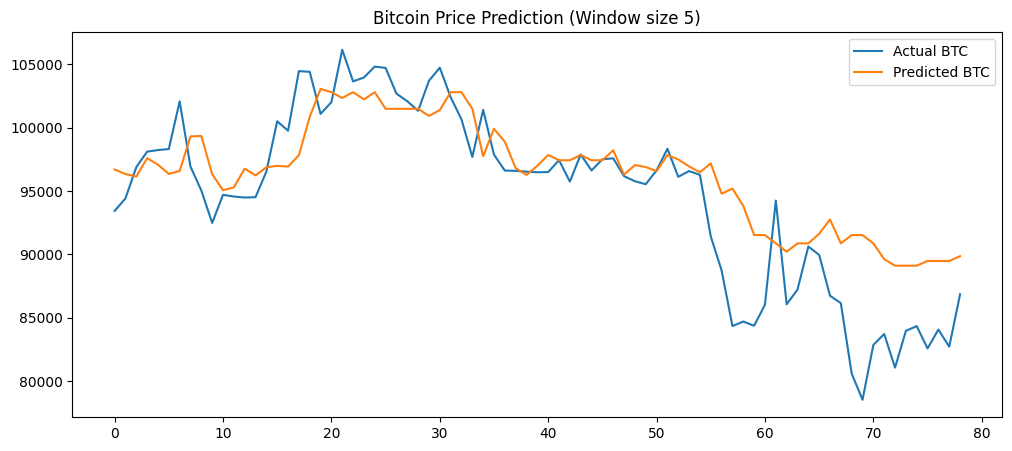

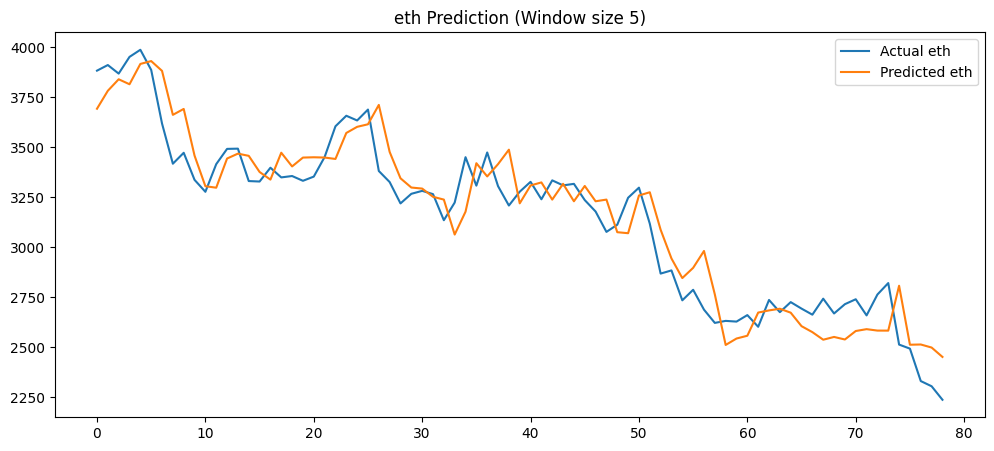

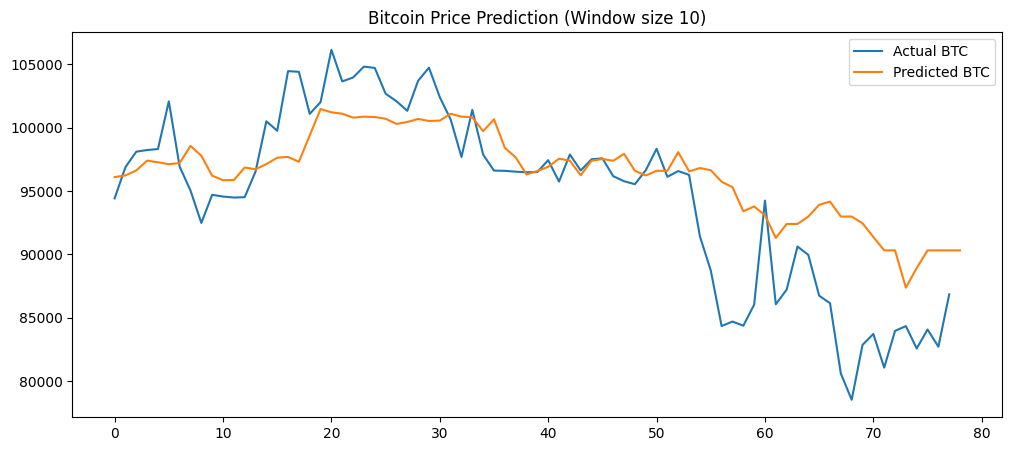

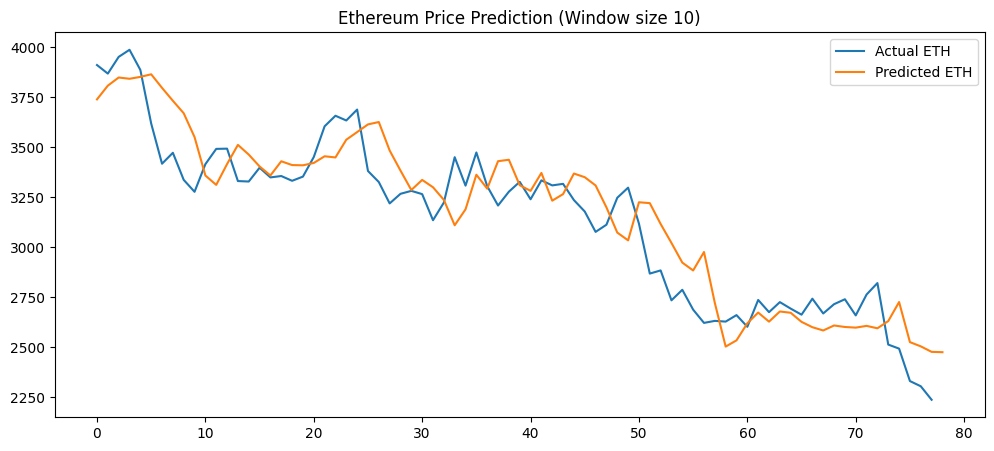

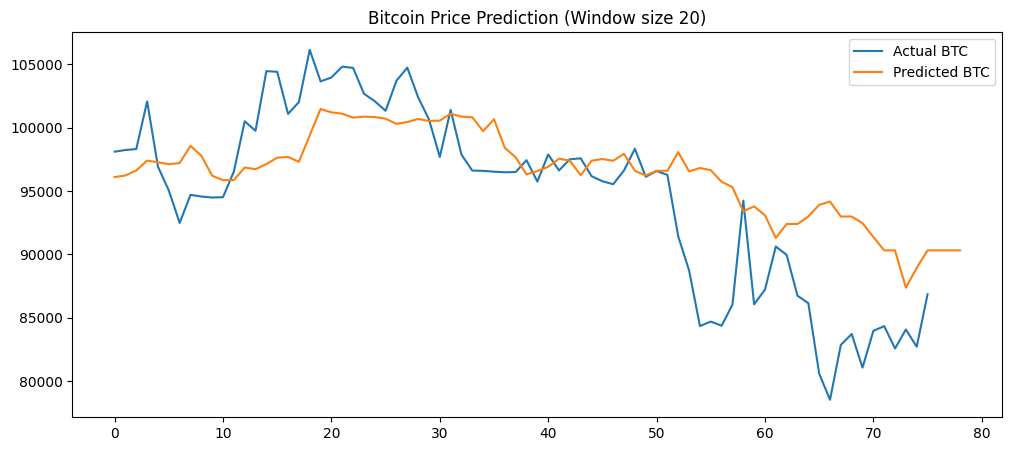

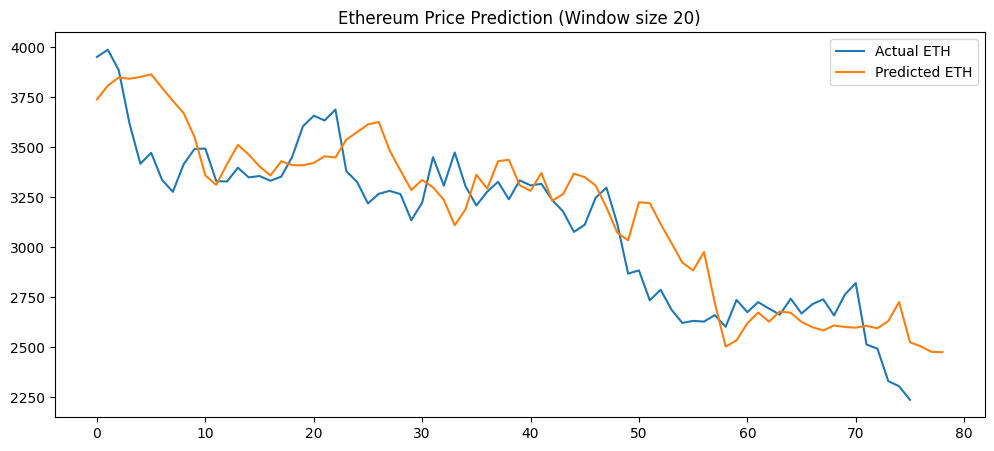

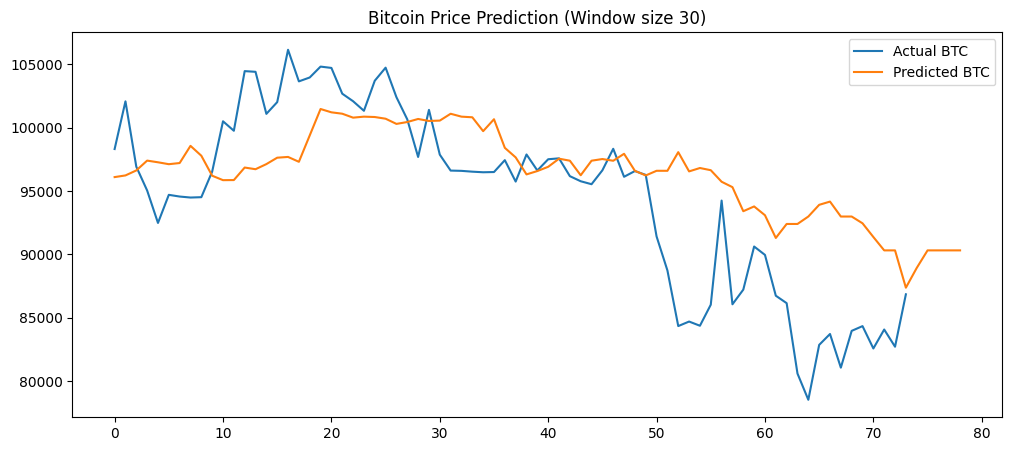

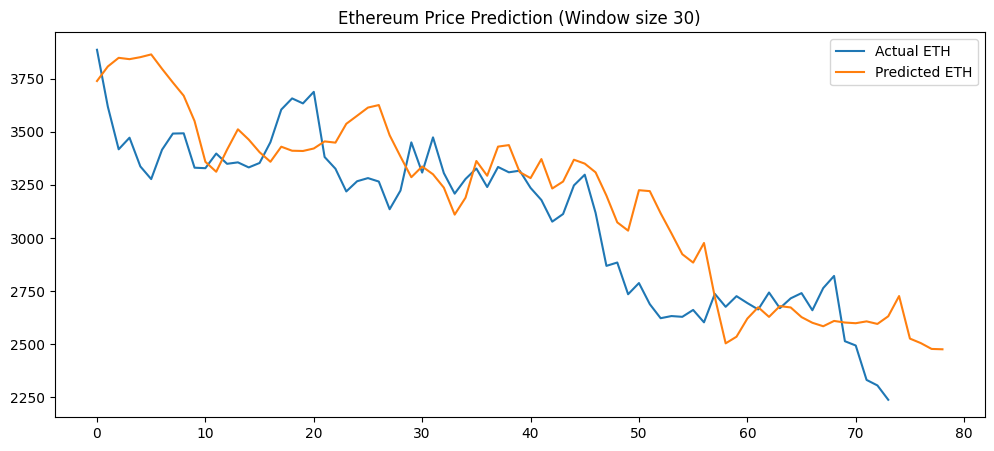

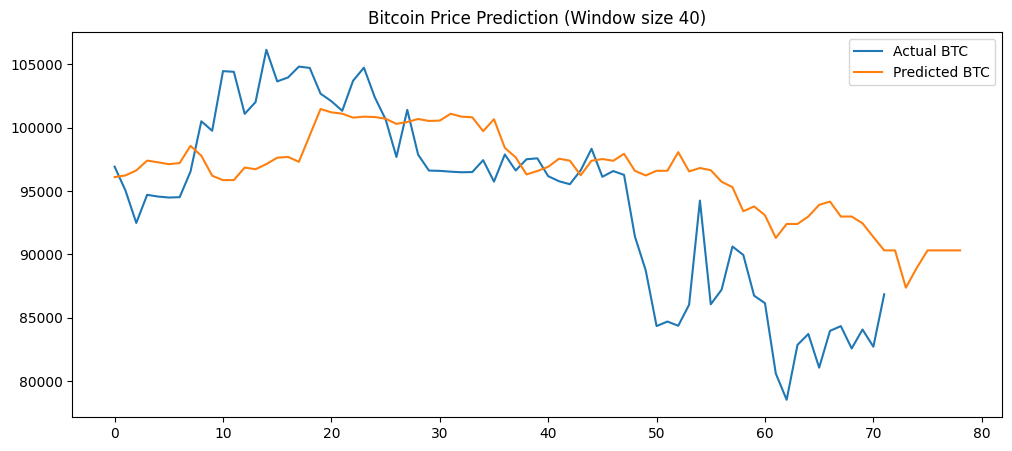

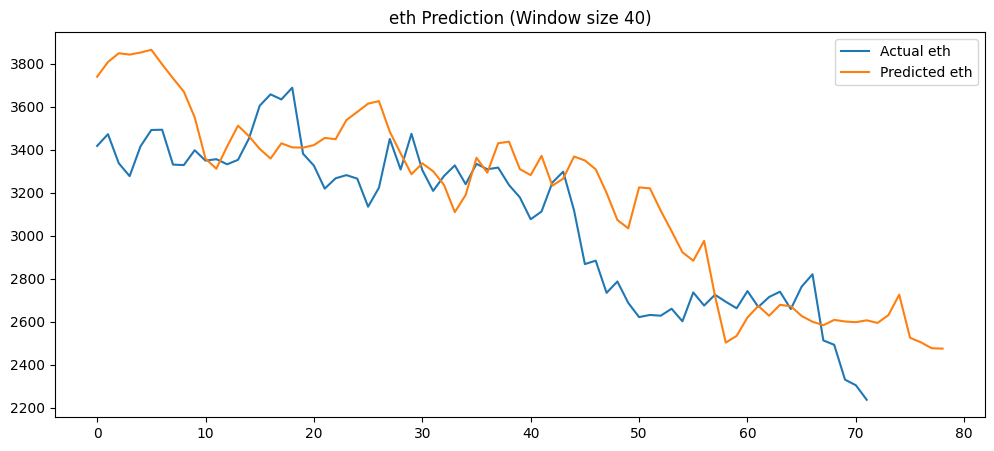

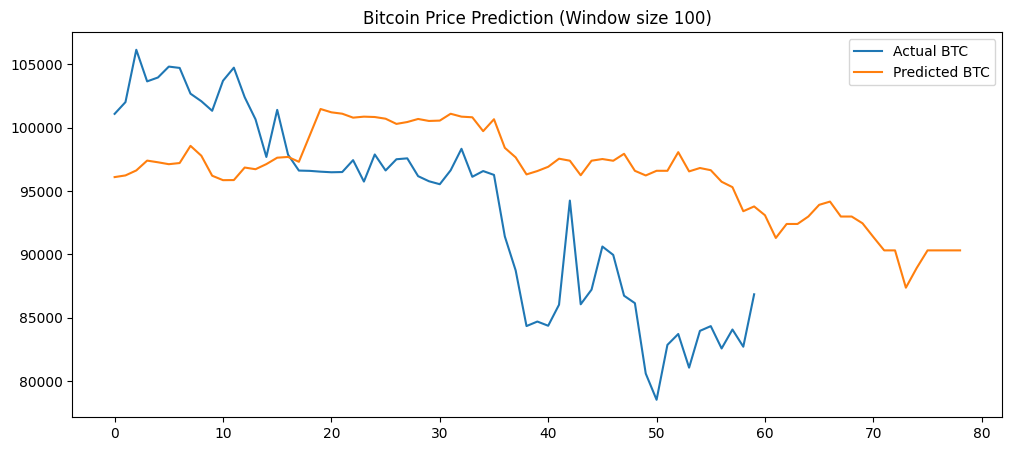

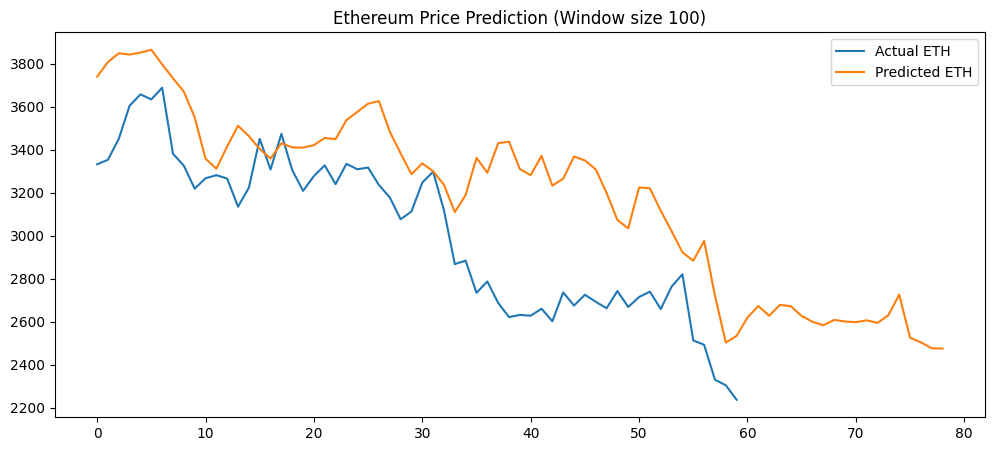

In [8]:
# Window size 5:
plt.figure(figsize=(12, 5))
plt.plot(y_test_btc, label='Actual BTC')
plt.plot(y_pred_btc, label='Predicted BTC')
plt.legend()
plt.title('Bitcoin Price Prediction (Window size 5)')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test_eth, label='Actual eth')
plt.plot(y_pred_eth, label='Predicted eth')
plt.legend()
plt.title('eth Prediction (Window size 5)')
plt.show()

# Window size 10:
plt.figure(figsize=(12, 5))
plt.plot(y_test_btc_10, label='Actual BTC')
plt.plot(y_pred_btc_10, label='Predicted BTC')
plt.legend()
plt.title('Bitcoin Price Prediction (Window size 10)')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test_eth_10, label='Actual ETH')
plt.plot(y_pred_eth_10, label='Predicted ETH')
plt.legend()
plt.title('Ethereum Price Prediction (Window size 10)')
plt.show()

# Window size 20:
plt.figure(figsize=(12, 5))
plt.plot(y_test_btc_20, label='Actual BTC')
plt.plot(y_pred_btc_20, label='Predicted BTC')
plt.legend()
plt.title('Bitcoin Price Prediction (Window size 20)')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test_eth_20, label='Actual ETH')
plt.plot(y_pred_eth_20, label='Predicted ETH')
plt.legend()
plt.title('Ethereum Price Prediction (Window size 20)')
plt.show()

# Window size 30:
plt.figure(figsize=(12, 5))
plt.plot(y_test_btc_30, label='Actual BTC')
plt.plot(y_pred_btc_30, label='Predicted BTC')
plt.legend()
plt.title('Bitcoin Price Prediction (Window size 30)')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test_eth_30, label='Actual ETH')
plt.plot(y_pred_eth_30, label='Predicted ETH')
plt.legend()
plt.title('Ethereum Price Prediction (Window size 30)')
plt.show()

# Window size 40:
plt.figure(figsize=(12, 5))
plt.plot(y_test_btc_40, label='Actual BTC')
plt.plot(y_pred_btc_40, label='Predicted BTC')
plt.legend()
plt.title('Bitcoin Price Prediction (Window size 40)')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test_eth_40, label='Actual eth')
plt.plot(y_pred_eth_40, label='Predicted eth')
plt.legend()
plt.title('eth Prediction (Window size 40)')
plt.show()

# Window size 100:
plt.figure(figsize=(12, 5))
plt.plot(y_test_btc_100, label='Actual BTC')
plt.plot(y_pred_btc_100, label='Predicted BTC')
plt.legend()
plt.title('Bitcoin Price Prediction (Window size 100)')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(y_test_eth_100, label='Actual ETH')
plt.plot(y_pred_eth_100, label='Predicted ETH')
plt.legend()
plt.title('Ethereum Price Prediction (Window size 100)')
plt.show()


Розсіювання

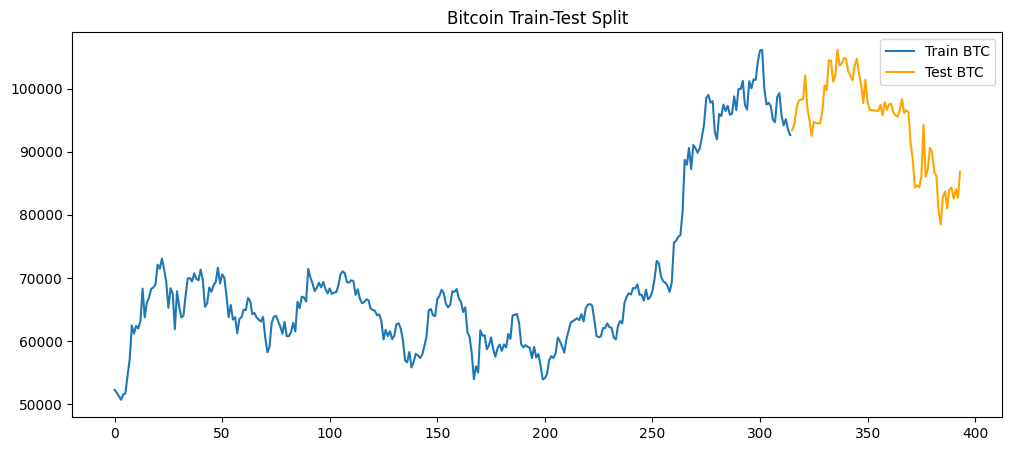

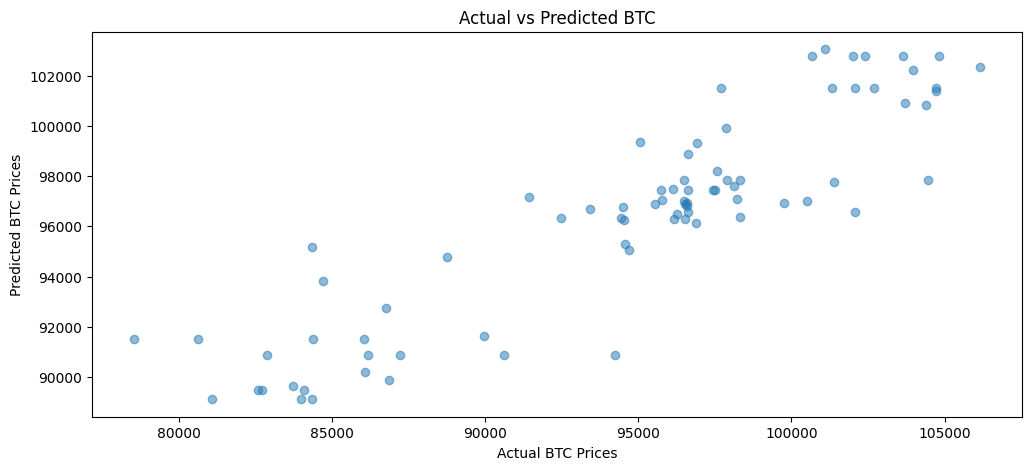

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(y_train_btc, label='Train BTC')
plt.plot(range(len(y_train_btc), len(y_train_btc) + len(y_test_btc)), y_test_btc, label='Test BTC', color='orange')
plt.legend()
plt.title('Bitcoin Train-Test Split')
plt.show()

plt.figure(figsize=(12, 5))
plt.scatter(y_test_btc, y_pred_btc, alpha=0.5)
plt.xlabel('Actual BTC Prices')
plt.ylabel('Predicted BTC Prices')
plt.title('Actual vs Predicted BTC')
plt.show()


RandomForestRegressor, GradientBoosting

In [10]:
results = []

X_train = X_train_btc
X_test = X_test_btc
y_train = y_train_btc
y_test = y_test_btc

rf_params = [10, 50, 100, 200]
for n in rf_params:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append(("RandomForest", n, mae, mse))
    print(f"RandomForest n_estimators={n}: MAE={mae:.4f}, MSE={mse:.4f}")

gb_params = [10, 50, 100, 200]
for n in gb_params:
    model = GradientBoostingRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append(("GradientBoosting", n, mae, mse))
    print(f"GradientBoosting n_estimators={n}: MAE={mae:.4f}, MSE={mse:.4f}")

best_model = min(results, key=lambda x: x[2])  # Мінімальний MAE
print(f"\nНайкраща модель: {best_model[0]} з n_estimators={best_model[1]} (MAE={best_model[2]:.4f}, MSE={best_model[3]:.4f})")

RandomForest n_estimators=10: MAE=2678.1385, MSE=13409309.7829
RandomForest n_estimators=50: MAE=2726.4790, MSE=13925611.9896
RandomForest n_estimators=100: MAE=2706.0224, MSE=14389644.7724
RandomForest n_estimators=200: MAE=2711.2978, MSE=14311365.8501
GradientBoosting n_estimators=10: MAE=8121.2258, MSE=82922844.3173
GradientBoosting n_estimators=50: MAE=2537.7749, MSE=11724425.1982
GradientBoosting n_estimators=100: MAE=2543.1699, MSE=11838176.3631
GradientBoosting n_estimators=200: MAE=2568.9422, MSE=12125280.7917

Найкраща модель: GradientBoosting з n_estimators=50 (MAE=2537.7749, MSE=11724425.1982)


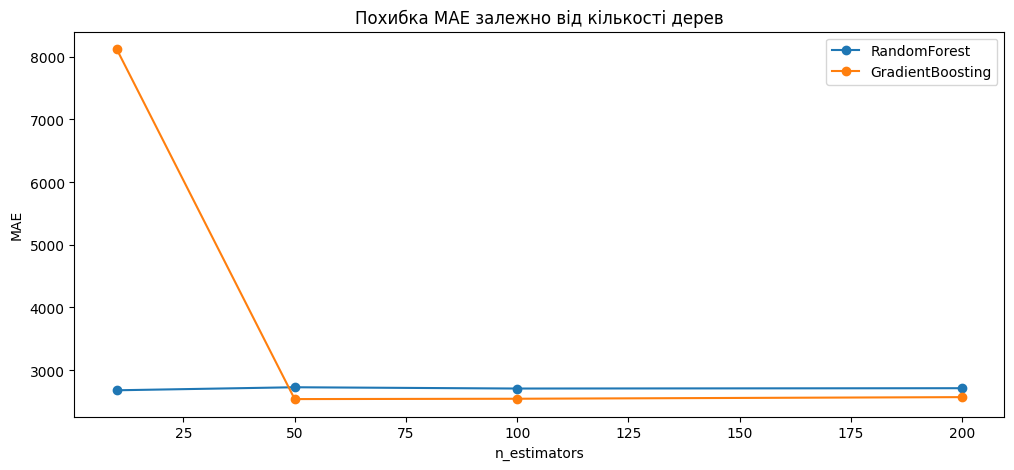

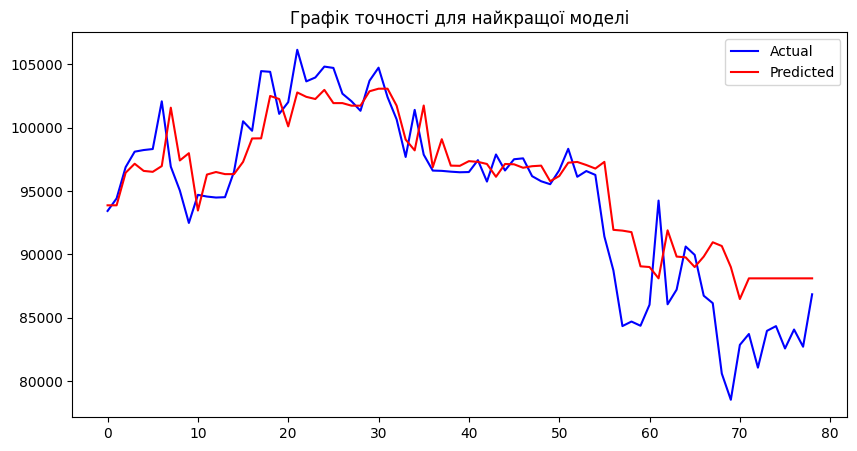

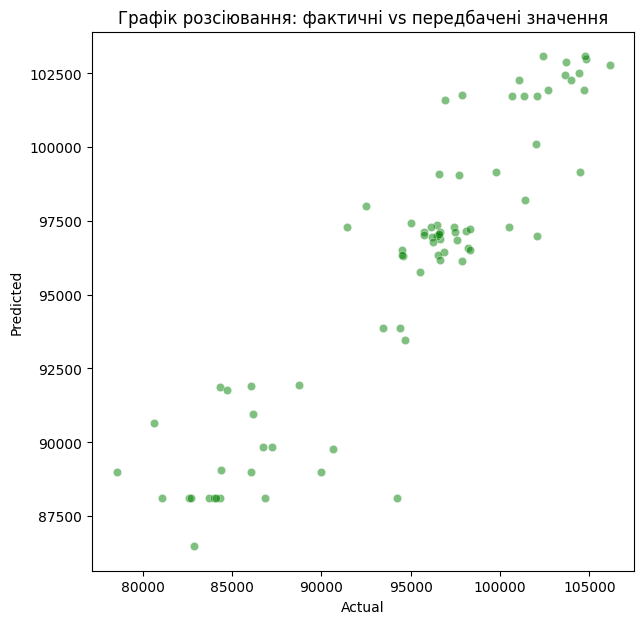

In [11]:
plt.figure(figsize=(12, 5))
for model_type in ["RandomForest", "GradientBoosting"]:
    subset = [(n, mae) for m, n, mae, mse in results if m == model_type]
    params, mae_values = zip(*subset)
    plt.plot(params, mae_values, marker='o', label=model_type)
plt.xlabel("n_estimators")
plt.ylabel("MAE")
plt.title("Похибка MAE залежно від кількості дерев")
plt.legend()
plt.show()

best_model_instance = RandomForestRegressor(n_estimators=best_model[1], random_state=42) if best_model[0] == "RandomForest" else GradientBoostingRegressor(n_estimators=best_model[1], random_state=42)
best_model_instance.fit(X_train, y_train)
y_best_pred = best_model_instance.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_best_pred, label="Predicted", color='red')
plt.legend()
plt.title("Графік точності для найкращої моделі")
plt.show()

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_best_pred, alpha=0.5, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Графік розсіювання: фактичні vs передбачені значення")
plt.show()